<a href="https://colab.research.google.com/github/krunalkatware/krunalkatware/blob/main/PRACTICAL_05_ML_KRUNAL_KATWARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#KRUNAL KATWARE
#(CS23004)
# AIM to build and evaluate a decision tree model for classfication  tasks and study the effect of tree depth and splitting criteria

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/ML_DATASET/daily_weather.csv"
df=pd.read_csv(path)
df.head(5)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [ ]:
df.shape


(1095, 11)

In [ ]:
df.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


In [ ]:
df.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.isnull().any().any()

np.True_

In [ ]:
df.isnull().sum()

,0
number,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0


In [ ]:
#print missing value
df[df.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [ ]:
df.drop('number', axis=1, inplace=True, errors='ignore')
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.shape

(1095, 10)

In [ ]:
before_rows=df.shape[0]
df = df.dropna()
after_rows = df.shape[0]
print("Before rows:",before_rows)
print("After rows:",after_rows)
print("The number of dropped rows are:",before_rows-after_rows)


Before rows: 1095
After rows: 1064
The number of dropped rows are: 31


In [ ]:
df.shape

(1064, 10)

In [ ]:
clean_data = df.copy()
clean_data ['high_humidity_label'] = (clean_data['relative_humidity_3pm']>24.99)*1
print(clean_data['high_humidity_label'])


0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


In [ ]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humidity_label'],
      dtype='object')

In [ ]:
clean_data.drop('relative_humidity_9am', axis=1, inplace=True, errors='ignore')
clean_data.drop('relative_humidity_3pm', axis=1, inplace=True, errors='ignore')
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'high_humidity_label'],
      dtype='object')

In [ ]:
X=clean_data.iloc[:,:-1]
print(X)

      air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0           918.060000     74.822000              271.100000   
1           917.347688     71.403843              101.935179   
2           923.040000     60.638000               51.000000   
3           920.502751     70.138895              198.832133   
4           921.160000     44.294000              277.800000   
...                ...           ...                     ...   
1090        918.900000     63.104000              192.900000   
1091        918.710000     49.568000              241.600000   
1092        916.600000     71.096000              189.300000   
1093        912.600000     58.406000              172.700000   
1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.863283   
1               2.443009              140.471548            3.533324   
2              

In [ ]:
Y=clean_data.iloc[:,-1]
print(Y)

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
5,915.30000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0
315,917.09000,63.266000,175.500000,6.733189,186.300000,7.963506,0.00,0.0
918,915.07000,58.046000,186.200000,7.695074,195.600000,8.992499,0.00,0.0
105,917.40000,73.868000,181.700000,4.138339,189.800000,4.764682,0.05,460.0
98,916.52000,51.638000,190.800000,7.404271,198.000000,8.388525,0.37,2170.0
...,...,...,...,...,...,...,...,...
336,912.89000,45.320000,213.400000,21.250930,220.500000,23.577348,0.03,250.0
476,917.18000,62.834000,186.300000,3.221194,197.700000,4.026492,0.00,0.0
123,920.18000,62.744000,32.600000,3.019869,51.300000,3.825167,0.00,0.0
1075,922.85811,64.989361,63.483047,10.261187,73.170504,11.949206,0.00,0.0


In [ ]:
X_test

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
32,918.700000,76.226000,184.600000,4.093600,194.900000,4.742313,0.0,0.0
1084,917.130000,80.240000,183.300000,1.632966,38.500000,2.259309,0.0,0.0
423,921.090000,70.124000,182.800000,2.908022,204.500000,3.534365,0.0,0.0
767,915.220000,73.292000,148.300000,1.789552,198.500000,2.908022,0.0,0.0
818,921.400000,63.050000,223.200000,1.319795,185.000000,1.879030,0.0,0.0
...,...,...,...,...,...,...,...,...
503,919.738161,67.432744,147.470882,1.157775,129.981819,1.899000,0.0,0.0
585,916.250000,79.754000,48.600000,1.073731,99.800000,1.588227,0.0,0.0
389,916.500000,74.588000,101.200000,1.834291,132.400000,2.594850,0.0,0.0
715,923.600000,65.030000,62.300000,7.091100,75.100000,8.410894,0.0,0.0


In [ ]:
Y_train

,high_humidity_label
5,1
315,1
918,1
105,1
98,1
...,...
336,1
476,1
123,1
1075,0


In [ ]:
Y_test

,high_humidity_label
32,1
1084,1
423,1
767,1
818,1
...,...
503,0
585,1
389,1
715,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler = scaler.transform(X_test)

In [ ]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

[Text(0.39285714285714285, 0.9166666666666666, 'x[0] <= 0.103\ngini = 0.5\nsamples = 744\nvalue = [370, 374]'),
 Text(0.21428571428571427, 0.75, 'x[1] <= 0.646\ngini = 0.404\nsamples = 391\nvalue = [110, 281]'),
 Text(0.30357142857142855, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[2] <= -1.096\ngini = 0.201\nsamples = 230\nvalue = [26, 204]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.21428571428571427, 0.4166666666666667, 'gini = 0.127\nsamples = 205\nvalue = [14.0, 191.0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.499\nsamples = 161\nvalue = [84, 77]'),
 Text(0.5714285714285714, 0.75, 'x[1] <= -0.884\ngini = 0.388\nsamples = 353\nvalue = [260, 93]'),
 Text(0.4821428571428571, 0.8333333333333333, '  False'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[2] <= -1.287\ngini = 0.451\nsamples = 64\nvalue = [22, 42]'),
 Text(0.35714285714285715, 0.4166666666666667, 'x[3] 

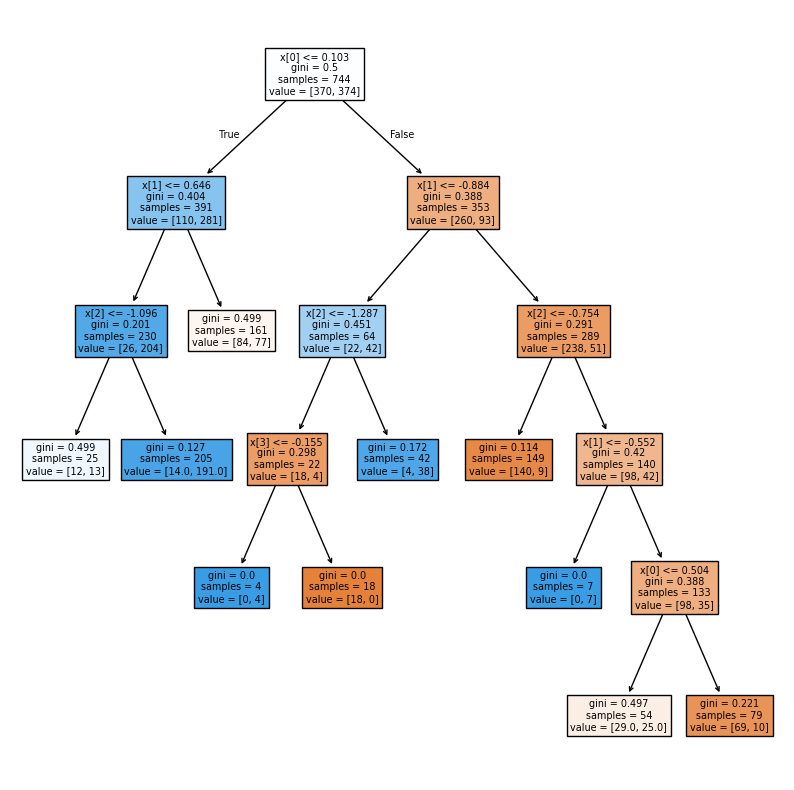

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(humidity_classifier, filled=True)

In [ ]:
Y_pred = humidity_classifier.predict(X_test)
print(Y_pred)

[0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0]


In [ ]:
#Accuraccy
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[138  27]
 [ 52 103]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       165
           1       0.79      0.66      0.72       155

    accuracy                           0.75       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320

